# Survival Analysis :  Quick Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


## Real World Example 

### We will be using Telco Customer Churn data from Kaggle
https://www.kaggle.com/blastchar/telco-customer-churn/

In [3]:
##  create a dataframe
df =  pd.read_csv(".\Data\write.csv")
# df =  pd.read_csv("./Data/latestdata.csv")

In [3]:
## Have a first look at the data
df.head() 

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN


In [4]:
## Data Types and Missing Values in Columns
# df.info()  

In [5]:
filtered = df[['date_confirmation','date_death_or_discharge','outcome','symptoms']].dropna()
filtered

,date_confirmation,date_death_or_discharge,outcome,symptoms
28,21.01.2020,24.01.2020,discharged,"fatigue, fever, headache"
29,21.01.2020,29.01.2020,discharged,"fatigue, fever"
31,24.01.2020,03.02.2020,discharged,"systemic weakness, runny nose, fever"
33,15.01.2020,15.01.2020,discharged,"cough, fever, sore throat"
34,24.01.2020,17.01.2020,discharged,"cough, fever, shortness of breath"
...,...,...,...,...
574,24.01.2020,05.02.2020,discharge,fever
580,25.01.2020,08.02.2020,discharged,"cough, fever"
582,08.02.2020,17.02.2020,discharged,diarrhea
1128,11.03.2020,11.03.2020,death,"severe, kidney failure and hypertension"


## Symptoms

In [6]:
sym_dict = filtered["symptoms"].value_counts().to_dict()

In [7]:
sym_dict

{'acute respiratory failure:pneumonia': 11,
 'acute respiratory distress syndrome:pneumonia': 10,
 'fever': 7,
 'pneumonia': 7,
 'septic shock:pneumonia': 7,
 'cough, fever': 6,
 'fever, sore throat': 4,
 'acute respiratory distress syndrome': 4,
 'acute respiratory distress syndrome:severe pneumonia': 3,
 'cough': 3,
 'acute respiratory distress:pneumonia': 3,
 'none': 3,
 'transient fatigue': 2,
 'discomfort': 2,
 'cough, fever, runny nose': 2,
 'cough, fever, shortness of breath': 2,
 'cough, shortness of breath': 2,
 'severe, kidney failure and hypertension': 2,
 'acute respiratory failure': 2,
 'cough, runny nose': 2,
 'difficulty breathing': 2,
 'fatigue, fever': 2,
 'systemic weakness, runny nose, fever': 2,
 'diarrhea': 2,
 'fatigue, fever, headache': 2,
 'cough, sore throat': 2,
 'cough, fever, sore throat': 2,
 'fever, headache, runny nose': 2,
 'respiratory symptoms': 2,
 'anorexia, fatigue': 2,
 'heart failure:pneumonia': 2,
 'acute respiratory distress syndrome:septic shoc

In [8]:
import re
symptoms = []
for kys in sym_dict.keys():
    keys = re.split(':|,|;',kys)
    for k in keys:
        if k[0]==' ':
            symptoms.append(k[1:])
        else:
            symptoms.append(k)

In [9]:
symptoms = set(symptoms)
symptoms.remove('Severe')
symptoms.remove('none')
symptoms

{'acute coronary syndrome',
 'acute kidney injury',
 'acute myocardial infarction',
 'acute renal failure',
 'acute respiratory disease',
 'acute respiratory disease syndrome',
 'acute respiratory distress',
 'acute respiratory distress syndrome',
 'acute respiratory failure',
 'anorexia',
 'arrhythmia',
 'body malaise',
 'cardiac arrhythmia',
 'cardiogenic shock',
 'cardiopulmonary arrest',
 'chest distress',
 'chills',
 'colds',
 'congestive heart failure',
 'conjunctivitis',
 'cough',
 'diarrhea',
 'difficulty breathing',
 'discomfort',
 'dysphagia',
 'dyspnea',
 'eye irritation',
 'fatigue',
 'fever',
 'gastritis',
 'grasp',
 'headache',
 'heart failure',
 'hypoxia',
 'kidney failure and hypertension',
 'mialgia',
 'multiple electrolyte imbalance',
 'multiple organ failure',
 'muscular soreness',
 'myalgias',
 'myocardial dysfunction',
 'myocardial infarction',
 'pneumonia',
 'primary myelofibrosis',
 'respiratory symptoms',
 'running nose',
 'runny nose',
 'sepsis',
 'septic shock

In [10]:
for s in symptoms:
    filtered[s]=np.zeros(len(filtered))

In [11]:
length = len(filtered)
filtered.index = list(range(length))

for idx in range(length):
    sym = filtered.loc[idx,['symptoms']][0]
    sym = re.split(':|,|;',sym)
    for s in sym:
        if s[0]== ' ':
            s=s[1:]
        if s in symptoms:
            filtered.loc[idx,[s]]=1

In [12]:
filtered.loc[0].to_dict()

{'date_confirmation': '21.01.2020',
 'date_death_or_discharge': '24.01.2020',
 'outcome': 'discharged',
 'symptoms': 'fatigue, fever, headache',
 'acute renal failure': 0.0,
 'gastritis': 0.0,
 'cough': 0.0,
 'respiratory symptoms': 0.0,
 'mialgia': 0.0,
 'chest distress': 0.0,
 'eye irritation': 0.0,
 'running nose': 0.0,
 'severe pneumonia': 0.0,
 'acute coronary syndrome': 0.0,
 'diarrhea': 0.0,
 'multiple electrolyte imbalance': 0.0,
 'acute respiratory disease': 0.0,
 'muscular soreness': 0.0,
 'conjunctivitis': 0.0,
 'primary myelofibrosis': 0.0,
 'transient fatigue': 0.0,
 'sore throat': 0.0,
 'discomfort': 0.0,
 'myalgias': 0.0,
 'heart failure': 0.0,
 'body malaise': 0.0,
 'acute respiratory failure': 0.0,
 'severe': 0.0,
 'sepsis': 0.0,
 'cardiopulmonary arrest': 0.0,
 'difficulty breathing': 0.0,
 'fatigue': 1.0,
 'fever': 1.0,
 'acute kidney injury': 0.0,
 'acute myocardial infarction': 0.0,
 'grasp': 0.0,
 'congestive heart failure': 0.0,
 'pneumonia': 0.0,
 'torpid evolut

## data 관련

In [13]:
filtered['outcome']=filtered['outcome'].apply(lambda x: 1 if x == 'died' or x == 'death' or  x == 'dead' or x == 'Deceased' or x == 'Died' or x == 'Death' or x == 'Dead'else 0 )

In [14]:
filtered["outcome"].value_counts()

1    100
0     56
Name: outcome, dtype: int64

In [15]:
d,m,y = filtered.loc[1,['date_confirmation']][0].split('.')

In [16]:
from datetime import datetime

In [17]:
int(d)

21

In [18]:
length = len(filtered)
filtered.index = list(range(length))

In [19]:
filtered

,date_confirmation,date_death_or_discharge,outcome,symptoms,acute renal failure,gastritis,cough,respiratory symptoms,mialgia,chest distress,...,shortness of breath,dyspnea,acute respiratory disease syndrome,chills,kidney failure and hypertension,multiple organ failure,colds,systemic weakness,myocardial infarction,septic shock
0,21.01.2020,24.01.2020,0,"fatigue, fever, headache",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21.01.2020,29.01.2020,0,"fatigue, fever",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24.01.2020,03.02.2020,0,"systemic weakness, runny nose, fever",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,15.01.2020,15.01.2020,0,"cough, fever, sore throat",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.01.2020,17.01.2020,0,"cough, fever, shortness of breath",0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,24.01.2020,05.02.2020,0,fever,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,25.01.2020,08.02.2020,0,"cough, fever",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,08.02.2020,17.02.2020,0,diarrhea,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154,11.03.2020,11.03.2020,1,"severe, kidney failure and hypertension",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from datetime import datetime

days = []
for idx in range(length):
  conf = filtered.loc[idx,['date_confirmation']][0]
  if '-' in conf:
    a,b,c = conf.split(" - ")[0].split('.')
  else:
    a,b,c = conf.split('.')
  dead = filtered.loc[idx,['date_death_or_discharge']][0]
  if '-' in dead:
    x,y,z = dead.split(" - ")[0].split('.')
  else:
    x,y,z = dead.split('.')

  if int(y) > 12:
    t = x
    x=y
    y=t
  if int(b) > 12:
    t = a
    a=b
    b=t

  death = datetime(int(z),int(y),int(x),0,0,0)
  confirm = datetime(int(c),int(b),int(a),0,0,0)
  days.append((death-confirm).days)


In [21]:
filtered["days"] = days

In [22]:
filtered2 = filtered[filtered["days"]<0]
filtered2

,date_confirmation,date_death_or_discharge,outcome,symptoms,acute renal failure,gastritis,cough,respiratory symptoms,mialgia,chest distress,...,dyspnea,acute respiratory disease syndrome,chills,kidney failure and hypertension,multiple organ failure,colds,systemic weakness,myocardial infarction,septic shock,days
4,24.01.2020,17.01.2020,0,"cough, fever, shortness of breath",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7
68,13.03.2020,11.03.2020,1,acute respiratory failure:pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2
76,18.03.2020,17.03.2020,1,acute respiratory distress syndrome,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
77,19.03.2020,18.03.2020,1,cardiac arrhythmia:septic shock:pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1
79,21.03.2020,14.03.2020,1,pneumonia:acute respiratory failure:heart failure,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7
80,21.03.2020,20.03.2020,1,septic shock:pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1
81,21.03.2020,19.03.2020,1,acute respiratory distress syndrome:pneumonia:...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2
83,21.03.2020,16.03.2020,1,pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5
84,21.03.2020,19.03.2020,1,septic shock:pneumonia,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-2
85,23.01.2020,22.01.2020,1,"chest distress, dyspnea",0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


In [23]:
for idx in range(length):
  d = int(filtered.loc[idx,['days']][0])
  if d < 0:
    conf = filtered.loc[idx,['date_confirmation']][0]
    if '-' in conf:
      a,b,c = conf.split(" - ")[0].split('.')
    else:
      a,b,c = conf.split('.')
    dead = filtered.loc[idx,['date_death_or_discharge']][0]
    if '-' in dead:
      x,y,z = dead.split(" - ")[0].split('.')
    else:
      x,y,z = dead.split('.')

    try:
      death = datetime(int(z),int(x),int(y),0,0,0)
      confirm = datetime(int(c),int(a),int(b),0,0,0)
      filtered.loc[idx,['days']] = -(death-confirm).days
    except:
      filtered.loc[idx,['days']] = None
  else:
    pass


In [24]:
filtered = filtered.dropna()
filtered

,date_confirmation,date_death_or_discharge,outcome,symptoms,acute renal failure,gastritis,cough,respiratory symptoms,mialgia,chest distress,...,dyspnea,acute respiratory disease syndrome,chills,kidney failure and hypertension,multiple organ failure,colds,systemic weakness,myocardial infarction,septic shock,days
0,21.01.2020,24.01.2020,0,"fatigue, fever, headache",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,21.01.2020,29.01.2020,0,"fatigue, fever",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,24.01.2020,03.02.2020,0,"systemic weakness, runny nose, fever",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0
3,15.01.2020,15.01.2020,0,"cough, fever, sore throat",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,23.01.2020,19.02.2020,0,"cough, fever",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,24.01.2020,05.02.2020,0,fever,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
152,25.01.2020,08.02.2020,0,"cough, fever",0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
153,08.02.2020,17.02.2020,0,diarrhea,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
154,11.03.2020,11.03.2020,1,"severe, kidney failure and hypertension",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## hr

<AxesSubplot:xlabel='timeline'>

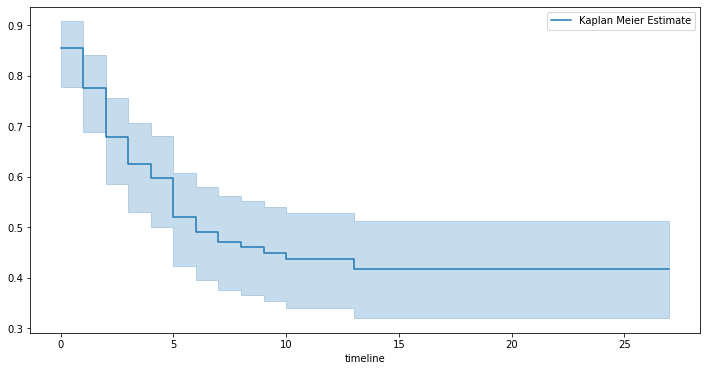

In [25]:
## Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

## Import the library
from lifelines import KaplanMeierFitter


durations = filtered['days'] ## Time to event data of censored and event data
event_observed = filtered['outcome']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

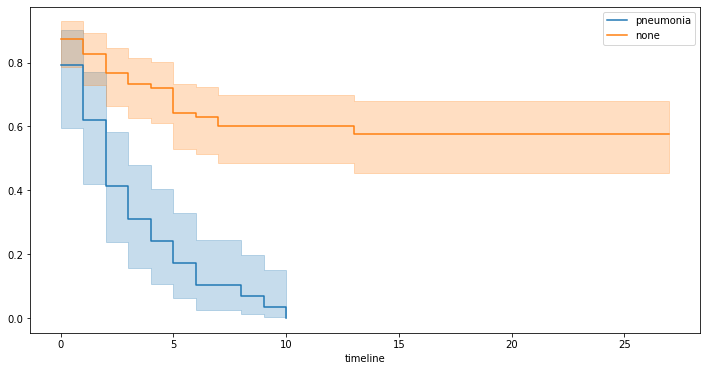

In [26]:
kmf = KaplanMeierFitter() 


T = filtered['days']     ## time to event
E = filtered['outcome']      ## event occurred or censored


groups = filtered['pneumonia']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 1)   ## Cohort 1
ix2 = (groups == 0)         ## Cohort 2


kmf.fit(T[ix1], E[ix1], label='pneumonia')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='none')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


## Cox Proportional Hazard Model (Survival Regression)

In [27]:
from lifelines import CoxPHFitter 

In [29]:
symptoms
# cough

{'acute coronary syndrome',
 'acute kidney injury',
 'acute myocardial infarction',
 'acute renal failure',
 'acute respiratory disease',
 'acute respiratory disease syndrome',
 'acute respiratory distress',
 'acute respiratory distress syndrome',
 'acute respiratory failure',
 'anorexia',
 'arrhythmia',
 'body malaise',
 'cardiac arrhythmia',
 'cardiogenic shock',
 'cardiopulmonary arrest',
 'chest distress',
 'chills',
 'colds',
 'congestive heart failure',
 'conjunctivitis',
 'cough',
 'diarrhea',
 'difficulty breathing',
 'discomfort',
 'dysphagia',
 'dyspnea',
 'eye irritation',
 'fatigue',
 'fever',
 'gastritis',
 'grasp',
 'headache',
 'heart failure',
 'hypoxia',
 'kidney failure and hypertension',
 'mialgia',
 'multiple electrolyte imbalance',
 'multiple organ failure',
 'muscular soreness',
 'myalgias',
 'myocardial dysfunction',
 'myocardial infarction',
 'pneumonia',
 'primary myelofibrosis',
 'respiratory symptoms',
 'running nose',
 'runny nose',
 'sepsis',
 'septic shock

In [56]:
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
df_r= filtered.loc[:,['outcome','days','fever','fatigue','severe pneumonia','pneumonia',
 'transient fatigue']]
df_r.head() ## have a look at the data 

,outcome,days,fever,fatigue,severe pneumonia,pneumonia,transient fatigue
0,0,3.0,1.0,1.0,0.0,0.0,0.0
1,0,8.0,1.0,1.0,0.0,0.0,0.0
2,0,10.0,1.0,0.0,0.0,0.0,0.0
3,0,0.0,1.0,0.0,0.0,0.0,0.0
5,0,27.0,1.0,0.0,0.0,0.0,0.0


In [57]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,outcome,days,fever,fatigue,severe pneumonia,pneumonia,transient fatigue
0,0,3.0,1.0,1.0,0.0,0.0,0.0
1,0,8.0,1.0,1.0,0.0,0.0,0.0
2,0,10.0,1.0,0.0,0.0,0.0,0.0
3,0,0.0,1.0,0.0,0.0,0.0,0.0
5,0,27.0,1.0,0.0,0.0,0.0,0.0


In [58]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'days', event_col='outcome')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 117 total observations, 54 right-censored observations>
             duration col = 'days'
                event col = 'outcome'
      baseline estimation = breslow
   number of observations = 117
number of events observed = 63
   partial log-likelihood = -242.78
         time fit was run = 2021-01-21 07:24:47 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
fever              -2.20       0.11       0.54            -3.27            -1.14                 0.04                 0.32
fatigue             1.23       3.42       0.81            -0.36             2.82                 0.70                16.80
severe pneumonia    0.88       2.40       0.55            -0.19             1.95                 0.82                 7.01
pneumonia           0.93       2.53       0.28             0.38             1.48                 1.46                 4.39
transient fatigue -16.51       0.00    2529.16         -4973.58          4940.56                 0.00                  inf

                      z      p   -log2(p)
covariate                                
fever             -4.06 <0.005      14.31
fatigue            1.51   0.13       2.94
severe pneumonia   1.61   0.11       3.21
pneumonia          3.30 <0.005      10.03
transient fatigue -0.01   0.99       0.01
---
Concordance = 0.76
Partial AIC = 495.56
log-likelihood ratio test = 62.37 on 5 df
-log2(p) of ll-ratio test = 37.89

<AxesSubplot:xlabel='log(HR) (95% CI)'>

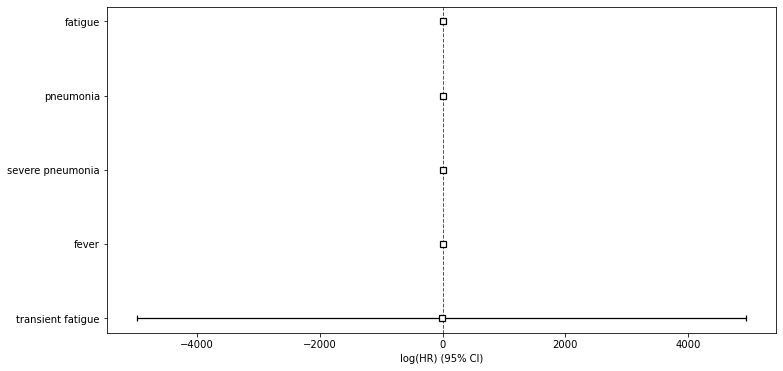

In [59]:
cph.plot()

In [ ]:
tr_rows = df_dummy.iloc[15:17, 2:]
tr_rows

In [ ]:
cph.predict_survival_function(tr_rows).plot()